# GIS con Python

##### En el presente proyecto se muestra como es que podemos transformar datos en información espacial, con un caso practico en el que se analizan los datos covid actualizados hasta la fecha 16/10/2021.   
##### Como primer paso, importamos las librerías necesarias para el proyecto

##### Pandas: Paquetería que nos permite trabajar con tablas de atributos 
##### Geopandas: Paquetería que nos permite trabajar con las geometrias 

In [1]:
import pandas as pd 
import geopandas as gpd
import numpy as np 
import matplotlib.pyplot as plt 

# Importación de datos 
##### Para importar los datos aplicaremos dos métodos, uno directamente desde la página de "Datos Abiertos Dirección General de Epidemiología" y otro en el que cargamos los archivos desde la consola de comandos de anaconda 


![title](Base.png)

In [2]:
cv= pd.read_csv('211015COVID19MEXICO.csv', encoding= 'ISO-8859-1')
cv.head()

D:\Conda\envs\geo_env\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (38) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2021-10-15,z482b8,2,12,9,2,9,9,12,1,...,2,2,97,2,97,1,99,MÃ©xico,97,97
1,2021-10-15,z49a69,1,12,23,1,23,23,4,2,...,1,2,97,2,97,2,99,MÃ©xico,97,1
2,2021-10-15,z23d9d,1,12,22,2,24,22,9,1,...,2,2,97,2,97,6,99,MÃ©xico,97,97
3,2021-10-15,z24953,1,12,9,1,9,9,10,1,...,1,1,2,2,97,7,99,MÃ©xico,97,97
4,2021-10-15,zz8e77,2,12,9,2,9,9,2,1,...,2,2,97,2,97,6,99,MÃ©xico,97,97


# Datos 

##### Mapearemos todos los datos que se tienen del covid-19 para el territorio de México, descargamos los mismos de la página de: https://www.gob.mx/salud/documentos/datos-abiertos-152127

##### Ya podemos visualizar que nuestros datos carecen de geometría, atributo que vuelve nuestra información espacial; por lo que le asignaremos dicha info. de la siguiente manera:  

# Datos Espaciales 

#### Para continuar con la asignación de datos espaciales, debemos de entrar en la pagina web de la conabio y descargar el archivo shp de la división municipal de México; en este caso descargaremos la versión 2019 ya que es la más actualizada 

http://www.conabio.gob.mx/informacion/gis/

#### Desde "anaconda prompt" se cargaron al script los archivos descargados  

In [3]:
mun= gpd.read_file('mun2019gw.shp')

#### A continuación en el grafico podemos observar que los datos efectivamente se encuentran seccionados por entidad municipal y corresponden al área geográfica de México.

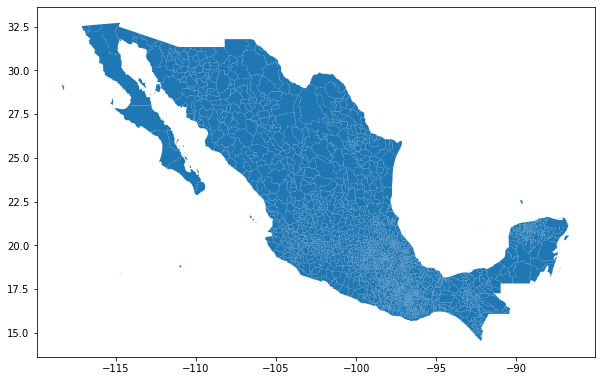

In [4]:
mun.plot(figsize=(10,10));

In [5]:
mun.head()

,CVEGEO,CVE_ENT,CVE_MUN,NOM_ENT,AREA,PERIMETER,COV_,COV_ID,NOM_MUN,geometry
0,01001,01,001,Aguascalientes,116635.924760,256.631026,0,1,Aguascalientes,"POLYGON ((-102.09775 22.02325, -102.09857 22.0..."
1,01002,01,002,Aguascalientes,54337.426596,192.096428,1,2,Asientos,"POLYGON ((-102.06290 22.30175, -102.06267 22.3..."
2,01003,01,003,Aguascalientes,92335.783227,171.636168,2,3,Calvillo,"POLYGON ((-102.57625 21.96778, -102.57626 21.9..."
3,01004,01,004,Aguascalientes,12838.354453,73.352682,3,4,CosÃ­o,"POLYGON ((-102.25320 22.37449, -102.25320 22.3..."
4,01005,01,005,Aguascalientes,49989.509147,163.500810,4,5,JesÃºs MarÃ­a,"POLYGON ((-102.31034 22.03716, -102.31034 22.0..."


# Base de Datos Espacial

##### Ya tenemos cargados los atributos y las geometrías, lo que nos interesa es que cada geometría (polígono que define la entidad municipal) tenga su correspondiente elemento de la tabla de atributos; es decir que los datos de Aguascalientes caigan en el polígono de Aguascalientes y así sucesivamente para todos los municipios  

In [6]:
cv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11035519 entries, 0 to 11035518
Data columns (total 40 columns):
 #   Column                 Dtype 
---  ------                 ----- 
 0   FECHA_ACTUALIZACION    object
 1   ID_REGISTRO            object
 2   ORIGEN                 int64 
 3   SECTOR                 int64 
 4   ENTIDAD_UM             int64 
 5   SEXO                   int64 
 6   ENTIDAD_NAC            int64 
 7   ENTIDAD_RES            int64 
 8   MUNICIPIO_RES          int64 
 9   TIPO_PACIENTE          int64 
 10  FECHA_INGRESO          object
 11  FECHA_SINTOMAS         object
 12  FECHA_DEF              object
 13  INTUBADO               int64 
 14  NEUMONIA               int64 
 15  EDAD                   int64 
 16  NACIONALIDAD           int64 
 17  EMBARAZO               int64 
 18  HABLA_LENGUA_INDIG     int64 
 19  INDIGENA               int64 
 20  DIABETES               int64 
 21  EPOC                   int64 
 22  ASMA                   int64 
 23  INMUS

In [7]:
mun.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2483 entries, 0 to 2482
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   CVEGEO     2483 non-null   object  
 1   CVE_ENT    2483 non-null   object  
 2   CVE_MUN    2483 non-null   object  
 3   NOM_ENT    2483 non-null   object  
 4   AREA       2483 non-null   float64 
 5   PERIMETER  2483 non-null   float64 
 6   COV_       2483 non-null   int64   
 7   COV_ID     2483 non-null   int64   
 8   NOM_MUN    2483 non-null   object  
 9   geometry   2483 non-null   geometry
dtypes: float64(2), geometry(1), int64(2), object(5)
memory usage: 194.1+ KB


# Transformar datos

#### Para poder realizar el join espacial entre atributos y geometrias, debemos de tener el mismo tipo de dato, no solo en la forma de correspondendcia tipo: Datos de Aguascalientes-Geometria de Aguascalientes.

#### Se debe tener la correspondencia "str" a "str" o en su defecto "float" a "float" por lo que transformaremos los elementos de "ENTIDAD_RES" y "MUNICIPIO_RES" a "str" mediante una lista de comprención.

In [8]:
cv['mrg']= [str(i)+'-'+str(j) for i,j in zip(cv.ENTIDAD_RES,cv.MUNICIPIO_RES)];

In [9]:
cv.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI,mrg
0,2021-10-15,z482b8,2,12,9,2,9,9,12,1,...,2,97,2,97,1,99,MÃ©xico,97,97,9-12
1,2021-10-15,z49a69,1,12,23,1,23,23,4,2,...,2,97,2,97,2,99,MÃ©xico,97,1,23-4
2,2021-10-15,z23d9d,1,12,22,2,24,22,9,1,...,2,97,2,97,6,99,MÃ©xico,97,97,22-9
3,2021-10-15,z24953,1,12,9,1,9,9,10,1,...,1,2,2,97,7,99,MÃ©xico,97,97,9-10
4,2021-10-15,zz8e77,2,12,9,2,9,9,2,1,...,2,97,2,97,6,99,MÃ©xico,97,97,9-2


In [10]:
mun.head()

,CVEGEO,CVE_ENT,CVE_MUN,NOM_ENT,AREA,PERIMETER,COV_,COV_ID,NOM_MUN,geometry
0,01001,01,001,Aguascalientes,116635.924760,256.631026,0,1,Aguascalientes,"POLYGON ((-102.09775 22.02325, -102.09857 22.0..."
1,01002,01,002,Aguascalientes,54337.426596,192.096428,1,2,Asientos,"POLYGON ((-102.06290 22.30175, -102.06267 22.3..."
2,01003,01,003,Aguascalientes,92335.783227,171.636168,2,3,Calvillo,"POLYGON ((-102.57625 21.96778, -102.57626 21.9..."
3,01004,01,004,Aguascalientes,12838.354453,73.352682,3,4,CosÃ­o,"POLYGON ((-102.25320 22.37449, -102.25320 22.3..."
4,01005,01,005,Aguascalientes,49989.509147,163.500810,4,5,JesÃºs MarÃ­a,"POLYGON ((-102.31034 22.03716, -102.31034 22.0..."


In [11]:
mun['mrg']= [str(int(i))+'-'+str(int(j)) for i,j in zip(mun.CVE_ENT,mun.CVE_MUN)];

In [12]:
mun.head()

,CVEGEO,CVE_ENT,CVE_MUN,NOM_ENT,AREA,PERIMETER,COV_,COV_ID,NOM_MUN,geometry,mrg
0,01001,01,001,Aguascalientes,116635.924760,256.631026,0,1,Aguascalientes,"POLYGON ((-102.09775 22.02325, -102.09857 22.0...",1-1
1,01002,01,002,Aguascalientes,54337.426596,192.096428,1,2,Asientos,"POLYGON ((-102.06290 22.30175, -102.06267 22.3...",1-2
2,01003,01,003,Aguascalientes,92335.783227,171.636168,2,3,Calvillo,"POLYGON ((-102.57625 21.96778, -102.57626 21.9...",1-3
3,01004,01,004,Aguascalientes,12838.354453,73.352682,3,4,CosÃ­o,"POLYGON ((-102.25320 22.37449, -102.25320 22.3...",1-4
4,01005,01,005,Aguascalientes,49989.509147,163.500810,4,5,JesÃºs MarÃ­a,"POLYGON ((-102.31034 22.03716, -102.31034 22.0...",1-5


# Transformamos la base de datos covid en una base espacial  

In [13]:
mu= mun[['mrg','geometry']];
mu

,mrg,geometry
0,1-1,"POLYGON ((-102.09775 22.02325, -102.09857 22.0..."
1,1-2,"POLYGON ((-102.06290 22.30175, -102.06267 22.3..."
2,1-3,"POLYGON ((-102.57625 21.96778, -102.57626 21.9..."
3,1-4,"POLYGON ((-102.25320 22.37449, -102.25320 22.3..."
4,1-5,"POLYGON ((-102.31034 22.03716, -102.31034 22.0..."
...,...,...
2478,20-183,"POLYGON ((-98.36473 17.58262, -98.36356 17.582..."
2479,19-7,"POLYGON ((-99.62021 24.27840, -99.60523 24.308..."
2480,28-16,"POLYGON ((-99.62021 24.27840, -99.60523 24.308..."
2481,24-10,"POLYGON ((-99.63617 22.66566, -99.66599 22.675..."


In [14]:
gcv= pd.merge(cv,mu,on= 'mrg')

In [15]:
# gcv.head()

In [16]:
len(cv)

11035519

In [17]:
len(gcv)

11544884

In [18]:
# gcv= gpd.GeoDataFrame(gcv);

In [19]:
# gcv.head()

### CLASIFICACION_FINAL	 nos muestra los casos positivos con la clave "3" y negativos con la clave "7"

In [20]:
%time
pos= gcv[gcv.CLASIFICACION_FINAL==3]

Wall time: 0 ns


In [21]:
pos.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI,mrg,geometry
4,2021-10-15,z526b3,2,12,9,1,9,9,12,1,...,97,1,1,3,99,MÃ©xico,97,97,9-12,"POLYGON ((-99.20575 19.30568, -99.20567 19.305..."
5,2021-10-15,z526b3,2,12,9,1,9,9,12,1,...,97,1,1,3,99,MÃ©xico,97,97,9-12,"POLYGON ((-99.28761 19.14660, -99.29312 19.165..."
642,2021-10-15,0c0d9c,1,12,12,2,28,9,12,1,...,1,2,97,3,99,MÃ©xico,97,97,9-12,"POLYGON ((-99.20575 19.30568, -99.20567 19.305..."
643,2021-10-15,0c0d9c,1,12,12,2,28,9,12,1,...,1,2,97,3,99,MÃ©xico,97,97,9-12,"POLYGON ((-99.28761 19.14660, -99.29312 19.165..."
864,2021-10-15,1df36e,1,12,9,2,15,9,12,1,...,1,2,97,3,99,MÃ©xico,97,97,9-12,"POLYGON ((-99.20575 19.30568, -99.20567 19.305..."


In [22]:
%time
pos= pos['mrg'].value_counts().reset_index()
pos.rename(columns={'index':'mrg','mrg':'cnt'},inplace=True)

Wall time: 0 ns


In [23]:
pd.merge(pos,mu,on= 'mrg')

,mrg,cnt,geometry
0,9-12,134836,"POLYGON ((-99.20575 19.30568, -99.20567 19.305..."
1,9-12,134836,"POLYGON ((-99.28761 19.14660, -99.29312 19.165..."
2,9-7,133271,"POLYGON ((-99.05813 19.40072, -99.05814 19.400..."
3,22-14,127392,"POLYGON ((-100.41975 20.88999, -100.41637 20.8..."
4,22-14,127392,"POLYGON ((-100.41637 20.88890, -100.41975 20.8..."
...,...,...,...
2428,20-481,1,"POLYGON ((-97.74262 17.07093, -97.74437 17.069..."
2429,20-187,1,"POLYGON ((-96.71122 18.10744, -96.67072 18.082..."
2430,20-155,1,"POLYGON ((-96.92561 16.63774, -96.92632 16.637..."
2431,20-147,1,"POLYGON ((-97.31617 17.38787, -97.31289 17.384..."


In [24]:
pos

,mrg,cnt
0,9-12,134836
1,9-7,133271
2,22-14,127392
3,9-5,103312
4,21-114,76160
...,...,...
2410,20-481,1
2411,20-187,1
2412,20-155,1
2413,20-147,1


In [25]:
mu

,mrg,geometry
0,1-1,"POLYGON ((-102.09775 22.02325, -102.09857 22.0..."
1,1-2,"POLYGON ((-102.06290 22.30175, -102.06267 22.3..."
2,1-3,"POLYGON ((-102.57625 21.96778, -102.57626 21.9..."
3,1-4,"POLYGON ((-102.25320 22.37449, -102.25320 22.3..."
4,1-5,"POLYGON ((-102.31034 22.03716, -102.31034 22.0..."
...,...,...
2478,20-183,"POLYGON ((-98.36473 17.58262, -98.36356 17.582..."
2479,19-7,"POLYGON ((-99.62021 24.27840, -99.60523 24.308..."
2480,28-16,"POLYGON ((-99.62021 24.27840, -99.60523 24.308..."
2481,24-10,"POLYGON ((-99.63617 22.66566, -99.66599 22.675..."


### Graficación

In [26]:
pos= gpd.GeoDataFrame(pd.merge(pos,mu,on= 'mrg'))

In [27]:
len(pos)

2433

In [28]:
len(mu)

2483

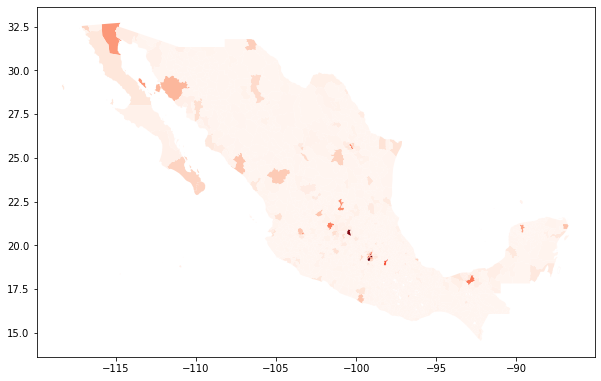

In [29]:
pos.plot('cnt',figsize=(10,10),cmap='Reds',vmin= 0, vmax=max(pos.cnt));
# plt.savefig('Preliminar.png',dpi=300,bbox_inches='tight');

In [30]:
len(mun[['CVE_ENT','NOM_ENT']].drop_duplicates())

32

In [31]:
mun[['CVE_ENT','NOM_ENT']].drop_duplicates().reset_index(drop= True)

,CVE_ENT,NOM_ENT
0,01,Aguascalientes
1,02,Baja California
2,03,Baja California Sur
3,04,Campeche
4,05,Coahuila de Zaragoza
5,06,Colima
6,07,Chiapas
7,08,Chihuahua
8,09,Ciudad de MÃ©xico
9,10,Durango


In [32]:
import cartopy.crs as ccrs
from matplotlib import cm 

In [33]:
print('El minimo de casos positivos es:',min(pos.cnt))
print('El maximo de casos positivos es:',max(pos.cnt))

El minimo de casos positivos es: 1
El maximo de casos positivos es: 134836


In [34]:
neg= gpd.GeoDataFrame(mu[~mu['mrg'].isin(pos['mrg'])])

In [35]:
est= gpd.read_file('Estados/dest2019gw.shp')

Wall time: 0 ns


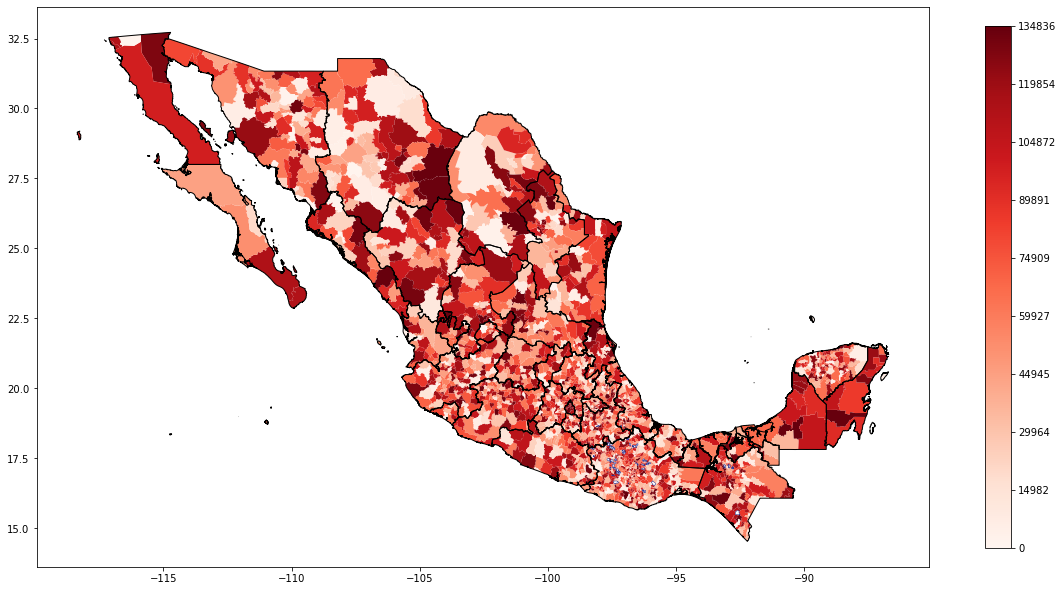

In [36]:
%time
norm= cm.colors.Normalize(vmin=0,vmax=max(pos.cnt))
cmap= cm.Reds
ax= pos.plot(figsize=(20,20),cmap=cmap.reversed(),vmin= 0, vmax=max(pos.cnt));
neg.plot(ax=ax,color='white',ec='#2B3490',linewidth=0.5)
est.boundary.plot(ax=ax,linewidth=1,ec='k')
ticks= np.linspace(0,max(pos.cnt),10)
plt.colorbar(cm.ScalarMappable(norm=norm,cmap=cmap),ax=ax,shrink= 0.48,ticks=ticks);
# plt.savefig('Error.png',dpi=300,bbox_inches='tight');

In [37]:
# neg.plot();

<ipython-input-38-6b079be6ab91>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  pos.centroid.plot(ax=ax,markersize=pos.cnt,alpha=0.02,color='green')


<AxesSubplot:>

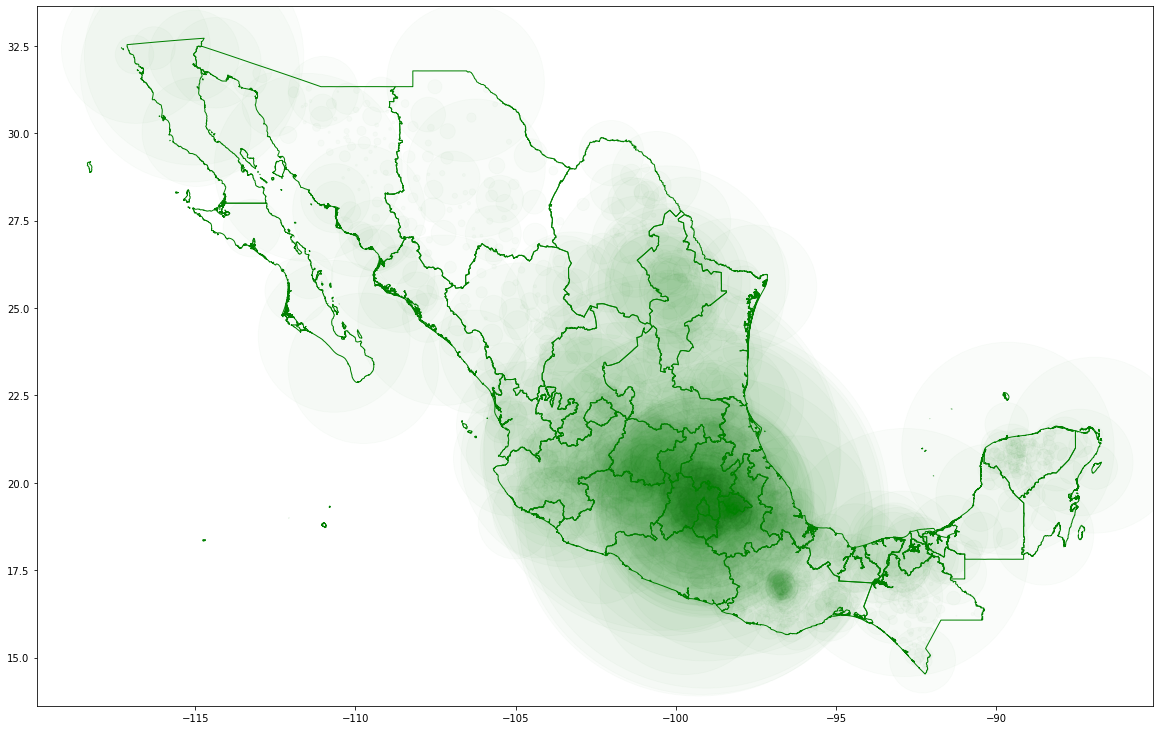

In [38]:
ax= est.boundary.plot(linewidth=1,ec='g',figsize=(20,20))
pos.centroid.plot(ax=ax,markersize=pos.cnt,alpha=0.02,color='green')
# plt.savefig('BufferDePropagación.png',dpi=300,bbox_inches='tight');

In [39]:
# est.crs

In [40]:
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER,LATITUDE_FORMATTER
import matplotlib.ticker as mticker
from matplotlib.colors import ListedColormap
from matplotlib.offsetbox import AnchoredText
from datetime import date 

Wall time: 0 ns


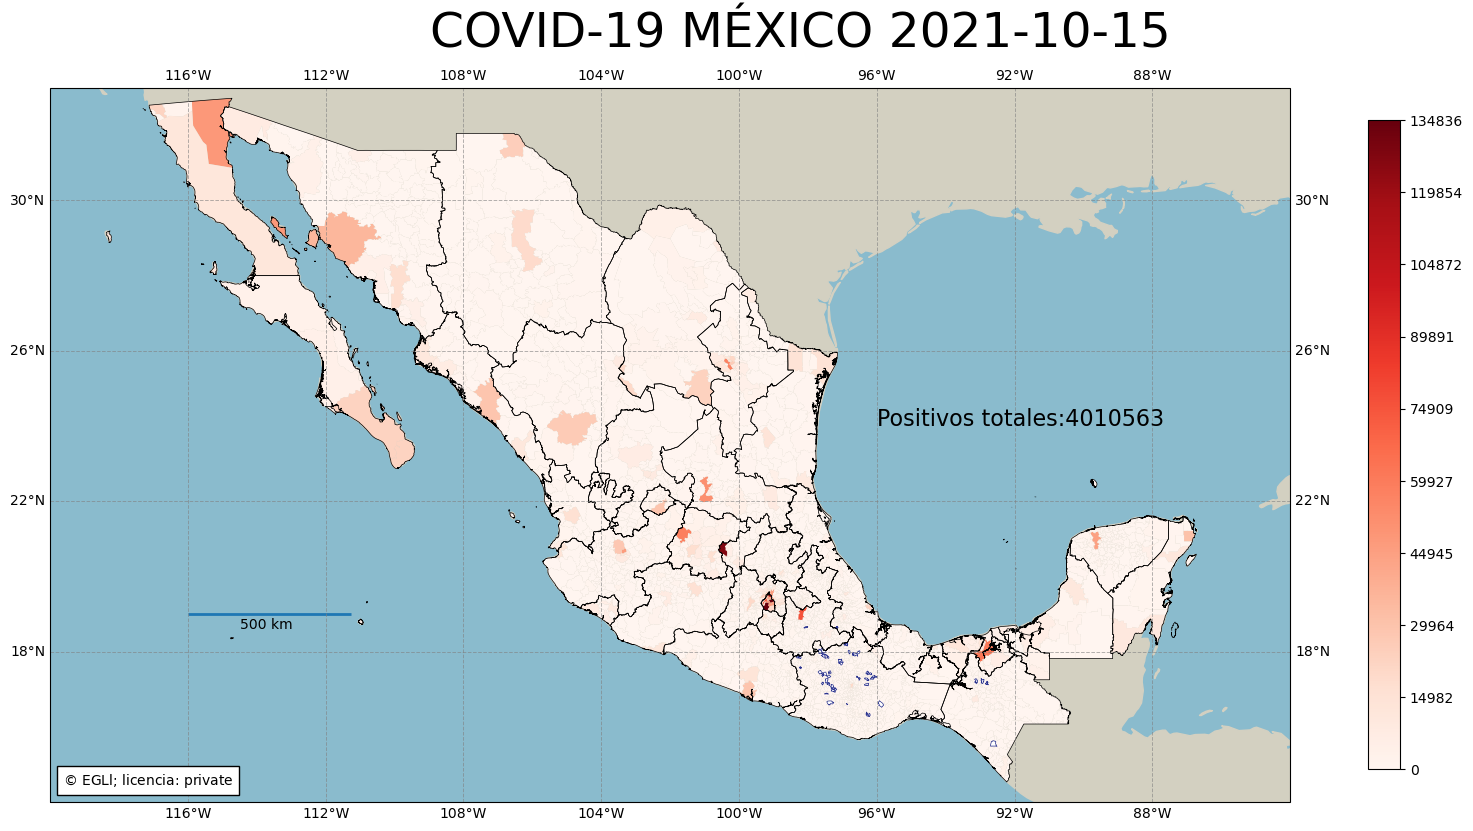

In [41]:
%time
plt.figure(dpi=100,figsize=(20,20))
norm= cm.colors.Normalize(vmin=0,vmax=max(pos.cnt))
cmap= cm.Reds
ax= plt.axes(projection=ccrs.PlateCarree())
ext= [-120,-84,14,33]
ax.set_extent(ext,crs=ccrs.PlateCarree())
ax.add_feature(cfeature.OCEAN,facecolor='#8ABBCD')
ax.add_feature(cfeature.LAND,facecolor='#D3D0c1')
pos.plot('cnt',ax=ax,cmap=cmap,vmin= 0, vmax=max(pos.cnt));
neg.plot(ax=ax,color='white',ec='#2B3490',linewidth=0.5)
est.boundary.plot(ax=ax,linewidth=0.5,ec='k')
ticks= np.linspace(0,max(pos.cnt),10)
plt.colorbar(cm.ScalarMappable(norm=norm,cmap=cmap),ax=ax,shrink= 0.43,ticks=ticks);
gl= ax.gridlines(crs= ccrs.PlateCarree(),draw_labels=True,linewidth=0.7,color='gray',alpha=0.6,linestyle='--')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlocator = mticker.FixedLocator(np.arange(ext[0], ext[1]+4,4))
gl.ylocator = mticker.FixedLocator(np.arange(ext[2],ext[3]+4,4))
plt.suptitle('COVID-19 MÉXICO '+date(2021,10,15).isoformat(),fontsize=35,y=0.72)
source= 'EGLl'
license= 'private'
text= AnchoredText('$\copyright$ {}; licencia: {}'.format(source,license),loc=3,prop={'size':10},frameon=True)
ax.add_artist(text)
plt.text(-96,24,'Positivos totales:'+str(np.sum(pos.cnt)),fontsize=16);
x1=-116
x2=-111.27
plt.hlines(19,x1,x2,linewidth=2)
plt.text(-114.5,18.6,'500 km');
# plt.savefig('ProductoFinal.png',dpi=300,bbox_inches='tight');

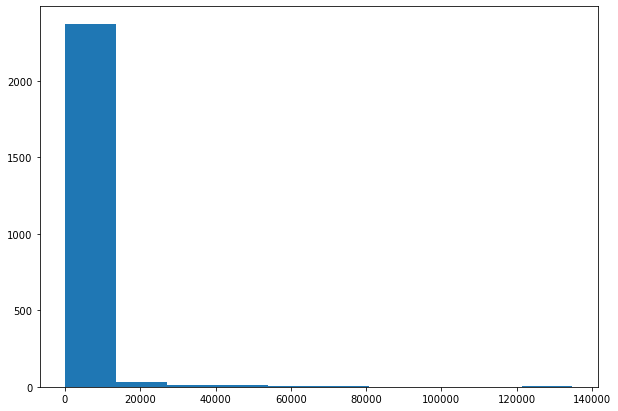

In [42]:
plt.figure(figsize=(10,7));
plt.hist(pos.cnt);
# plt.savefig('Estadisticas.png',dpi=300,bbox_inches='tight');

In [43]:
# !pip install geopy;

In [44]:
from geopy.distance import geodesic

In [45]:
# p1=(18,-116)
# p2=(18,-111.27)
# geodesic(p1,p2).km

### Estadisticas 

In [46]:
pos

,mrg,cnt,geometry
0,9-12,134836,"POLYGON ((-99.20575 19.30568, -99.20567 19.305..."
1,9-12,134836,"POLYGON ((-99.28761 19.14660, -99.29312 19.165..."
2,9-7,133271,"POLYGON ((-99.05813 19.40072, -99.05814 19.400..."
3,22-14,127392,"POLYGON ((-100.41975 20.88999, -100.41637 20.8..."
4,22-14,127392,"POLYGON ((-100.41637 20.88890, -100.41975 20.8..."
...,...,...,...
2428,20-481,1,"POLYGON ((-97.74262 17.07093, -97.74437 17.069..."
2429,20-187,1,"POLYGON ((-96.71122 18.10744, -96.67072 18.082..."
2430,20-155,1,"POLYGON ((-96.92561 16.63774, -96.92632 16.637..."
2431,20-147,1,"POLYGON ((-97.31617 17.38787, -97.31289 17.384..."


Text(1.0, 1.0, 'Fecha: 2021-10-15')

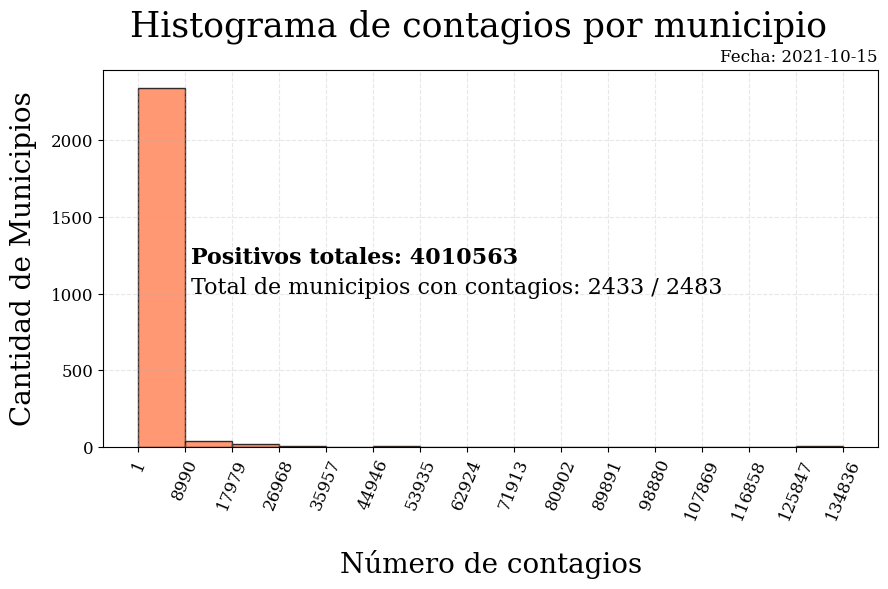

In [47]:
#Función para cuando el ancho de clase contiene más de un valor de nuestra muestra
def cb2(x,b):
    el=len(set(x))
    an=(max(x)-min(x))/b #((el-1)/b)
    bt=[0 for x in range(b+1)]
    bt[0]=min(list((set(x))))
    i=1
    while i<len(bt):
        bt[i]=bt[i-1]+an
        i+=1
    return bt
bins=15

plt.figure(dpi=100,figsize=(10,5))
plt.hist(pos.cnt,ec='k',color="coral",alpha=0.8,bins=bins)
plt.xticks(cb2(pos.cnt,bins),np.round(cb2(pos.cnt,bins)).astype('int32'),rotation=67.5,fontname='serif',fontsize=12)
plt.yticks(fontname='serif',fontsize=12)
plt.ylabel("Cantidad de Municipios",fontsize=20,fontname='serif',labelpad=10)
plt.xlabel("Número de contagios",fontsize=20,fontname='serif',labelpad=20)
plt.suptitle("Histograma de contagios por municipio",fontsize=25,fontname='serif',y=1)
plt.grid(True,alpha=.3,linestyle='--')
plt.text(10000,1200,"Positivos totales: "+str(np.sum(pos.cnt)),fontsize=16,fontweight="bold",fontname='serif',ha= 'left')
plt.text(10000,1000,"Total de municipios con contagios: "+str(len(pos))+' / '+str(len(mun)),fontsize=16,fontname='serif',ha= 'left')
#plt.text(100,300,"Total de Municipios infectados: "+str(len(geofq)),fontsize=16,fontweight="bold",fontname='serif')
plt.title('Fecha: '+date(2021,10,15).isoformat(),loc='right',fontname='serif')
# plt.savefig('Estadisticas.png',dpi=300,bbox_inches='tight');

In [48]:
def dailytot(cv):  
    
    dp=cv[cv.CLASIFICACION_FINAL==3]
    dp['Fecha']=pd.to_datetime(dp.FECHA_INGRESO)
    dp=dp.sort_values(by='Fecha')
    tot=[]
    dai=[]
    fec=[]
    n=0
    for i in dp.Fecha.unique():
        fec.append(i)
        dg=dp[dp.Fecha==i]
        dai.append(len(dg))
        tot.append(len(dg)+n)
        n+=len(dg)

    con=pd.DataFrame({'Fecha':fec,'Dia':np.arange(0,len(fec)),'Diario':dai,'Total':tot})
    con.Fecha=pd.to_datetime(con.Fecha)
    con=con.sort_values(by='Fecha')
    
    return con

In [49]:
con=dailytot(gcv[gcv.CLASIFICACION_FINAL==3])

In [50]:
# plt.figure(figsize=(18,6))
# plt.scatter(con.Dia,con.Total,s=50,c='maroon')
# plt.yticks(fontsize=13,fontname='serif')
# x=plt.xticks()
# fti=[]
# for i in x[0][1:-1]:
#     fti.append(str(con.Fecha.iloc[int(i)])[:10])
    
# nt=['Día '+str(int(i)+1)+': '+j for i,j in zip(x[0][1:-1],fti)]
# plt.xticks(x[0][1:-1],nt,fontsize=13,fontname='serif',rotation=10)

# plt.ylabel('Contagiados',fontsize=35,fontname='serif',labelpad=25)
# plt.xlabel('Fecha',fontsize=35,fontname='serif',labelpad=25)
# plt.suptitle('COVID-19 México',fontsize=45,fontname='serif',y=1.05)
# plt.title('Hoy día '+str(int(con.Dia.iloc[-1])+1)+': '+str(con.Fecha.iloc[-1])[:10],loc='right',fontsize=15,fontname='serif')
# plt.grid(True,alpha=.1,linestyle='--')
# # plt.savefig('Por Dia.png',dpi=800,bbox_inches='tight');

In [51]:
import contextily as cx

In [52]:
cdmx=pos[pos.mrg.str[0]=='9']
cdmx.head();

In [53]:
df = cdmx.to_crs(epsg=3857)

In [54]:
src='http://a.tile.stamen.com/terrain/{z}/{x}/{y}.png'

In [55]:
from pyproj import Proj, transform

from folium import plugins
import folium
from random import seed
from random import random

from geopy import distance

D:\Conda\envs\geo_env\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
D:\Conda\envs\geo_env\lib\site-packages\pyproj\crs\crs.py:294: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(" ".join((projstring, projkwargs)))
D:\Conda\envs\geo_env\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of 

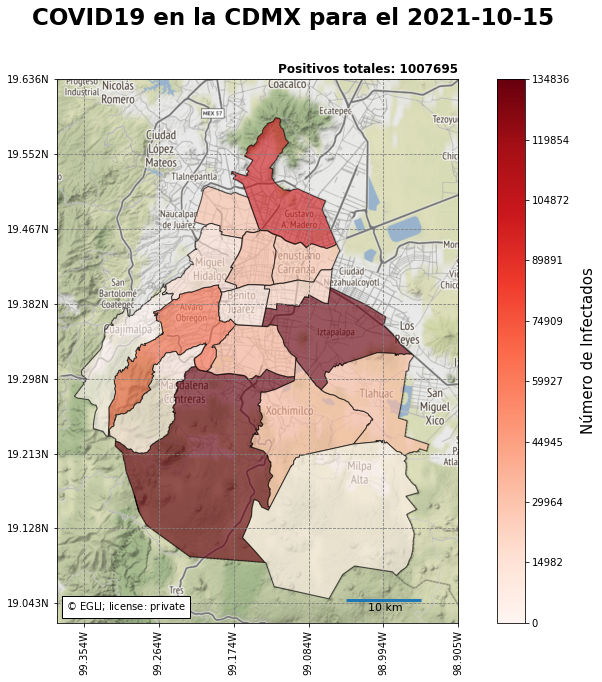

In [64]:
#plt.rcParams["figure.dpi"] = 120
norm = cm.colors.Normalize(vmax=df.cnt.max(), vmin=0)
cmap = cm.Reds
ax=df.plot('cnt',cmap=cmap,alpha=.63,figsize=(10, 10),ec='k')
cx.add_basemap(ax,source=src)
ticks=np.round(np.linspace(0,int(df.cnt.max()),10))
cbar=plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax,shrink=1,ticks=ticks,orientation='vertical',pad=.07)
cbar.set_label('Número de Infectados',fontsize=15,labelpad=11)
plt.suptitle("COVID19 en la CDMX para el "+date(2021,10,15).isoformat(),fontsize=23,fontweight="bold")
plt.title("Positivos totales: "+str(np.sum(df.cnt)),fontsize=12,color='black',fontweight="bold",loc='right')
SOURCE = 'EGLl'
LICENSE = 'private'
text = AnchoredText(r'$\copyright$ {}; license: {}'
                        ''.format(SOURCE, LICENSE),
                        loc=3, prop={'size': 10}, frameon=True)
ax.add_artist(text)
ax.grid(color='gray', linestyle='--', linewidth=.8)
y=plt.yticks()[0][1:]
x=plt.xticks()[0][1:]
ln=np.round(transform(Proj(init='epsg:3857'), Proj(init='epsg:4326'), x, np.repeat(y[0],len(x)))[0],3)
ln=[str(i)[1:]+'W' for i in ln]
lt=np.round(transform(Proj(init='epsg:3857'), Proj(init='epsg:4326'), np.repeat(x[0],len(y)),y)[1],3)
lt=[str(i)+'N' for i in lt]
plt.xticks(x,ln,rotation=90)
plt.yticks(y,lt)
xi=-1.1025e7
xf=-1.1015e7
ax.hlines(2160500,xi,xf,linewidth=3)
plt.text(-1.1022e7,2159000,"10 km",fontsize=11)
plt.savefig('CDMX'+date(2021,10,15).isoformat()+'.png',dpi=800,bbox_inches='tight');